In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [2]:
file = '~/galvanize/capstones/PredictingSearches-on-EDGAR/Logs/170403.csv'
df = pd.read_csv(file, names=['IP','Date','Time','Accession'])

In [3]:
Uniq = df.Accession.unique()

In [32]:
u = np.random.choice(Uniq, 100000)

# missing_zero_values_table(df)

## take 100,000 of unique documents, randomly
## cumcount hourly/ trend per day

## create features for slope, polynomial regression
## for loops
## eventually

NameError: name 'Uniq' is not defined

In [31]:
#DataFrame filtered for the Unique 100000
df1 = df[df['Accession'].isin(u)]

NameError: name 'u' is not defined

In [29]:
df1 = df1.reset_index()

NameError: name 'df1' is not defined

In [3]:
df['Datetime'] = df['Date'] + ' ' + df['Time']

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [13]:
df['Counts'] = df.groupby([df.Datetime.dt.hour,df.Accession]).cumcount()+1

,IP,Date,Time,Accession,Datetime,Counts
0,100.36.120.gfa,2017-04-03,00:00:00,0001104659-12-022840,2017-04-03,1
1,100.36.120.gfa,2017-04-03,00:00:00,0001140361-12-011496,2017-04-03,1
2,100.36.120.gfa,2017-04-03,00:00:00,0001263279-12-000012,2017-04-03,1
3,100.36.120.gfa,2017-04-03,00:00:00,0001354488-12-001393,2017-04-03,1
4,101.81.73.ceb,2017-04-03,00:00:00,0001019056-16-001471,2017-04-03,1
...,...,...,...,...,...,...
95,157.182.246.aaa,2017-04-03,00:00:00,0001104659-10-019343,2017-04-03,1
96,157.182.246.aaa,2017-04-03,00:00:00,0001171520-10-000392,2017-04-03,1
97,157.182.246.aaa,2017-04-03,00:00:00,0001104659-10-033375,2017-04-03,1
98,157.55.39.gjj,2017-04-03,00:00:00,0001398344-17-004314,2017-04-03,1


In [10]:
df1=df.drop(['IP','Date','Time'],axis=1)

In [17]:
df1.head()

,Accession
0,0001104659-12-022840
1,0001140361-12-011496
2,0001263279-12-000012
3,0001354488-12-001393
4,0001019056-16-001471


In [16]:
df[df.Accession.str.contains('0001415889-17-000555')]

,IP,Date,Time,Accession,Datetime,Counts
494,69.191.249.caa,2017-04-03,00:00:01,0001415889-17-000555,2017-04-03 00:00:01,1
497,69.191.249.gge,2017-04-03,00:00:01,0001415889-17-000555,2017-04-03 00:00:01,2
723,64.124.25.jig,2017-04-03,00:00:02,0001415889-17-000555,2017-04-03 00:00:02,3
1009,64.124.25.jig,2017-04-03,00:00:03,0001415889-17-000555,2017-04-03 00:00:03,4
1039,69.191.249.bgg,2017-04-03,00:00:03,0001415889-17-000555,2017-04-03 00:00:03,5
...,...,...,...,...,...,...
26126120,121.40.120.iee,2017-04-03,23:51:23,0001415889-17-000555,2017-04-03 23:51:23,23
26127834,117.89.48.aed,2017-04-03,23:51:29,0001415889-17-000555,2017-04-03 23:51:29,24
26127835,117.89.48.aed,2017-04-03,23:51:29,0001415889-17-000555,2017-04-03 23:51:29,25
26159902,141.160.13.ihd,2017-04-03,23:53:24,0001415889-17-000555,2017-04-03 23:53:24,26


In [63]:
#d10m = df1['Counts'].rolling('600s').sum()

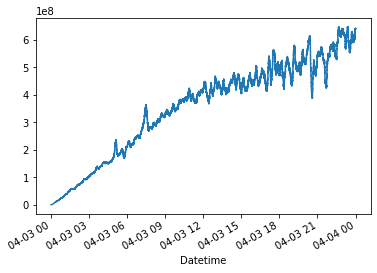

In [64]:
#d10m.plot()

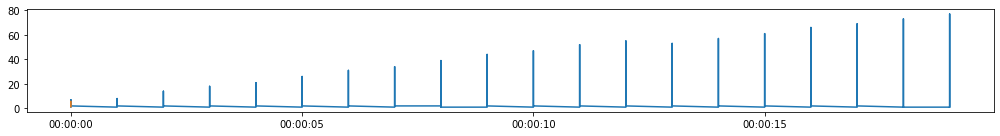

In [77]:
# fig, ax = plt.subplots(1, figsize=(14, 2))
# plot_linear_trend(ax, 'Docs', df1['Counts'])
# plt.tight_layout()

In [18]:
#get highest cumcounts
#df1['Accession'].nlargest(20,'Counts')
df2 = df.sort_values('Counts').drop_duplicates('Accession',keep='last').tail(20)

In [34]:
df2

,IP,Date,Time,Accession,Datetime,Counts
10345217,117.91.1.ebi,2017-04-03,10:59:59,0001028918-17-000097,2017-04-03 10:59:59,4382
19005085,97.100.78.cjb,2017-04-03,17:59:59,0001535538-17-000029,2017-04-03 17:59:59,4461
17762532,146.148.100.bgg,2017-04-03,16:59:29,0000914775-17-000044,2017-04-03 16:59:29,4605
6641514,107.178.194.jdd,2017-04-03,07:28:21,0001166388-16-000267,2017-04-03 07:28:21,4743
14046489,52.26.85.eib,2017-04-03,13:54:27,0001571049-17-002929,2017-04-03 13:54:27,4759
20180592,108.91.91.hbc,2017-04-03,18:59:19,0000908662-17-000089,2017-04-03 18:59:19,4792
11663870,108.91.91.hbc,2017-04-03,11:59:55,0001571049-17-003108,2017-04-03 11:59:55,4975
15350016,104.197.130.ghg,2017-04-03,14:59:43,0000088053-17-000548,2017-04-03 14:59:43,5357
7139420,173.16.90.eda,2017-04-03,07:57:16,0000095521-16-000309,2017-04-03 07:57:16,5409
7138619,173.16.90.eda,2017-04-03,07:57:13,0000095521-17-000007,2017-04-03 07:57:13,5758


In [20]:
#dflow = df1.sort_values('Counts').drop_duplicates('Accession',keep='last').tail(20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b375753d0>]],
      dtype=object)

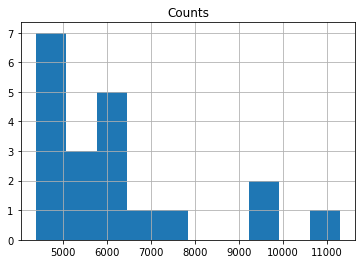

In [35]:
df2.hist()

In [13]:
#df1['Total_Count'] = np.arange(1, len(df1)+1)

In [14]:
#df1['Percent_Total'] = df1['Counts'] / df1['Total_Count']

In [60]:
#(df1.Accession.unique()).shape

(4110253,)

In [30]:
#dm = df1['Counts'].rolling('600s').mean()

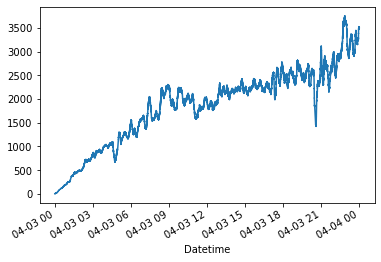

In [31]:
#dm.plot()

In [32]:
#d10mstd = df1['Counts'].rolling('600s').std()

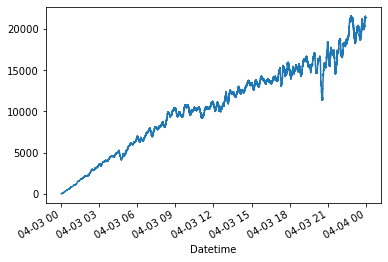

In [34]:
#d10mstd.plot()